In [12]:
import pandas as pd
import numpy as np
from sklearn.neural_network import MLPRegressor
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, ensemble

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

datos=pd.read_excel("midatasetnba.xlsx")
datos.head()

,Temporada,Jugador,Altura (cm),Peso (Kg),Año_Nacimiento,Edad,Universidad,Ciudad_Nacimiento,Estado_Nacimiento,Equipo,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1954,Al Roges,193,88,1930,23.0,Long Island University,NaN,NaN,BLB,...,0.726,NaN,NaN,213.0,160,NaN,NaN,NaN,177,570
1,1951,Art Burris,196,99,1924,26.0,University of Tennessee,NaN,NaN,FTW,...,0.583,NaN,NaN,106.0,27,NaN,NaN,NaN,51,77
2,1952,Art Burris,196,99,1924,27.0,University of Tennessee,NaN,NaN,FTW,...,0.583,NaN,NaN,49.0,11,NaN,NaN,NaN,39,43
3,1952,Art Burris,196,99,1924,27.0,University of Tennessee,NaN,NaN,MLH,...,0.704,NaN,NaN,50.0,16,NaN,NaN,NaN,30,67
4,1952,Art Burris,196,99,1924,27.0,University of Tennessee,NaN,NaN,TOT,...,0.667,NaN,NaN,99.0,27,NaN,NaN,NaN,69,110


In [13]:
p = datos.groupby('Jugador').Temporada.nunique().reset_index()
d = p.loc[:, 'Temporada'] > 5
me=p.loc[d]
numT = me.sort_values('Jugador',ascending=True)
numT

,Jugador,Temporada
0,A.C. Green,16
5,A.J. Price,6
8,Aaron Brooks,9
10,Aaron Gray,7
13,Aaron McKie,13
...,...,...
3907,Zan Tabak,6
3910,Zaza Pachulia,14
3914,Zelmo Beaty,8
3915,Zendon Hamilton,6


In [14]:
Jugs=[]
for i in numT['Jugador']:
    if i not in Jugs:
        Jugs.append(i)


In [15]:
dfe=datos[datos['Jugador'].isin(Jugs)]
dfef=dfe.sort_values('Jugador')
dfef.head()

,Temporada,Jugador,Altura (cm),Peso (Kg),Año_Nacimiento,Edad,Universidad,Ciudad_Nacimiento,Estado_Nacimiento,Equipo,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
14815,1997,A.C. Green,203,106,1960,33.0,NaN,NaN,NaN,TOT,...,0.650,222.0,434.0,656.0,69,70.0,16.0,74.0,145,597
10790,1999,A.C. Green,203,106,1960,35.0,NaN,NaN,NaN,DAL,...,0.577,82.0,146.0,228.0,25,28.0,8.0,19.0,69,246
16129,1995,A.C. Green,203,106,1960,31.0,NaN,NaN,NaN,PHO,...,0.732,194.0,475.0,669.0,127,55.0,31.0,114.0,146,916
16130,1996,A.C. Green,203,106,1960,32.0,NaN,NaN,NaN,PHO,...,0.709,166.0,388.0,554.0,72,45.0,23.0,79.0,141,612
14812,2000,A.C. Green,203,106,1960,36.0,NaN,NaN,NaN,LAL,...,0.695,160.0,326.0,486.0,80,53.0,18.0,53.0,127,413


In [16]:
print(dfef.columns)

Index(['Temporada', 'Jugador', 'Altura (cm)', 'Peso (Kg)', 'Año_Nacimiento',
       'Edad', 'Universidad', 'Ciudad_Nacimiento', 'Estado_Nacimiento',
       'Equipo', 'Posición', 'Partidos_Jugados', 'Partidos_Titular',
       'Minutos_Jugados', 'PER', 'TS%', '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%',
       'AST%', 'STL%', 'BLK%', 'TOV%', 'USG%', 'OWS', 'DWS', 'WS', 'WS/48',
       'OBPM', 'DBPM', 'BPM', 'VORP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%',
       '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB',
       'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS'],
      dtype='object')


In [17]:
res1=dfef.reset_index()

res2=res1.sort_values(['Jugador','Temporada'], ascending=False)
res=res2.reset_index()
res

,level_0,index,Temporada,Jugador,Altura (cm),Peso (Kg),Año_Nacimiento,Edad,Universidad,Ciudad_Nacimiento,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,17756,12337,2011,Zydrunas Ilgauskas,221,107,1975,35.0,NaN,Kaunas,...,0.783,108.0,179.0,287.0,26,23.0,58.0,52.0,185,360
1,17752,13605,2010,Zydrunas Ilgauskas,221,107,1975,34.0,NaN,Kaunas,...,0.743,114.0,231.0,345.0,48,14.0,50.0,63.0,183,474
2,17760,13608,2009,Zydrunas Ilgauskas,221,107,1975,33.0,NaN,Kaunas,...,0.799,157.0,333.0,490.0,64,28.0,84.0,90.0,183,838
3,17757,12336,2008,Zydrunas Ilgauskas,221,107,1975,32.0,NaN,Kaunas,...,0.802,263.0,419.0,682.0,104,34.0,120.0,135.0,247,1029
4,17758,12335,2007,Zydrunas Ilgauskas,221,107,1975,31.0,NaN,Kaunas,...,0.807,242.0,357.0,599.0,123,48.0,98.0,141.0,257,925
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17760,15,13613,1990,A.C. Green,203,106,1960,26.0,NaN,NaN,...,0.751,262.0,450.0,712.0,90,66.0,50.0,116.0,207,1061
17761,16,13614,1989,A.C. Green,203,106,1960,25.0,NaN,NaN,...,0.786,258.0,481.0,739.0,103,94.0,55.0,119.0,172,1088
17762,11,9447,1988,A.C. Green,203,106,1960,24.0,NaN,NaN,...,0.773,245.0,465.0,710.0,93,87.0,45.0,120.0,204,937
17763,13,10789,1987,A.C. Green,203,106,1960,23.0,NaN,NaN,...,0.780,210.0,405.0,615.0,84,70.0,80.0,102.0,171,852


In [18]:
df=res[['Temporada','Jugador','3P','3PA','2P','2PA','Minutos_Jugados','Partidos_Jugados',
        'Edad','PTS','FT', 'FTA','WS','WS/48']]
df.head()

,Temporada,Jugador,3P,3PA,2P,2PA,Minutos_Jugados,Partidos_Jugados,Edad,PTS,FT,FTA,WS,WS/48
0,2011,Zydrunas Ilgauskas,0.0,1.0,162,318,1145.0,72,35.0,360,36,46,2.9,0.122
1,2010,Zydrunas Ilgauskas,11.0,23.0,183,415,1339.0,64,34.0,474,75,101,2.5,0.088
2,2009,Zydrunas Ilgauskas,15.0,39.0,327,685,1765.0,65,33.0,838,139,174,5.6,0.151
3,2008,Zydrunas Ilgauskas,0.0,1.0,417,878,2222.0,73,32.0,1029,195,243,6.1,0.131
4,2007,Zydrunas Ilgauskas,0.0,1.0,385,792,2130.0,78,31.0,925,155,192,6.6,0.148


In [19]:

tr=df.assign(P31=np.nan,P32=np.nan,P33=np.nan,P3A1=np.nan,P3A2=np.nan,P3A3=np.nan,
             P21=np.nan,P22=np.nan,P23=np.nan,P2A1=np.nan,P2A2=np.nan,P2A3=np.nan,
             MIN1=np.nan,MIN2=np.nan,MIN3=np.nan,PJ1=np.nan,PJ2=np.nan,PJ3=np.nan,
             ED1=np.nan,ED2=np.nan,ED3=np.nan,PTS1=np.nan,PTS2=np.nan,PTS3=np.nan,
             FT1=np.nan,FT2=np.nan,FT3=np.nan,FTA1=np.nan,FTA2=np.nan,FTA3=np.nan,
             WS1=np.nan,WS2=np.nan,WS3=np.nan,WS48_1=np.nan,WS48_2=np.nan,WS48_3=np.nan,)

tr.head()

,Temporada,Jugador,3P,3PA,2P,2PA,Minutos_Jugados,Partidos_Jugados,Edad,PTS,...,FT3,FTA1,FTA2,FTA3,WS1,WS2,WS3,WS48_1,WS48_2,WS48_3
0,2011,Zydrunas Ilgauskas,0.0,1.0,162,318,1145.0,72,35.0,360,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2010,Zydrunas Ilgauskas,11.0,23.0,183,415,1339.0,64,34.0,474,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2009,Zydrunas Ilgauskas,15.0,39.0,327,685,1765.0,65,33.0,838,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2008,Zydrunas Ilgauskas,0.0,1.0,417,878,2222.0,73,32.0,1029,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2007,Zydrunas Ilgauskas,0.0,1.0,385,792,2130.0,78,31.0,925,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
print(tr.columns)

Index(['Temporada', 'Jugador', '3P', '3PA', '2P', '2PA', 'Minutos_Jugados',
       'Partidos_Jugados', 'Edad', 'PTS', 'FT', 'FTA', 'WS', 'WS/48', 'P31',
       'P32', 'P33', 'P3A1', 'P3A2', 'P3A3', 'P21', 'P22', 'P23', 'P2A1',
       'P2A2', 'P2A3', 'MIN1', 'MIN2', 'MIN3', 'PJ1', 'PJ2', 'PJ3', 'ED1',
       'ED2', 'ED3', 'PTS1', 'PTS2', 'PTS3', 'FT1', 'FT2', 'FT3', 'FTA1',
       'FTA2', 'FTA3', 'WS1', 'WS2', 'WS3', 'WS48_1', 'WS48_2', 'WS48_3'],
      dtype='object')


In [21]:

i=1
for j in tr:
    for i in tr.index:
        if tr.iat[i,1]==tr.iat[i-1,1]:
           
            tr.iat[i-1,14]=tr.iat[i,2]
            tr.iat[i-1,15]=tr.iat[i,14]
            tr.iat[i-1,16]=tr.iat[i,15]
            tr.iat[i-1,17]=tr.iat[i,3]
            tr.iat[i-1,18]=tr.iat[i,17]
            tr.iat[i-1,19]=tr.iat[i,18]
            tr.iat[i-1,20]=tr.iat[i,4]
            tr.iat[i-1,21]=tr.iat[i,20]
            tr.iat[i-1,22]=tr.iat[i,21]
            tr.iat[i-1,23]=tr.iat[i,5]
            tr.iat[i-1,24]=tr.iat[i,23]
            tr.iat[i-1,25]=tr.iat[i,24]
            tr.iat[i-1,26]=tr.iat[i,6]
            tr.iat[i-1,27]=tr.iat[i,26]
            tr.iat[i-1,28]=tr.iat[i,27]
            tr.iat[i-1,29]=tr.iat[i,7]
            tr.iat[i-1,30]=tr.iat[i,29]
            tr.iat[i-1,31]=tr.iat[i,30]
            tr.iat[i-1,32]=tr.iat[i,8]
            tr.iat[i-1,33]=tr.iat[i,32]
            tr.iat[i-1,34]=tr.iat[i,33]
            tr.iat[i-1,35]=tr.iat[i,9]
            tr.iat[i-1,36]=tr.iat[i,35]
            tr.iat[i-1,37]=tr.iat[i,36]
            tr.iat[i-1,38]=tr.iat[i,10]
            tr.iat[i-1,39]=tr.iat[i,38]
            tr.iat[i-1,40]=tr.iat[i,39]
            tr.iat[i-1,41]=tr.iat[i,11]
            tr.iat[i-1,42]=tr.iat[i,41]
            tr.iat[i-1,43]=tr.iat[i,42]
            tr.iat[i-1,44]=tr.iat[i,12]
            tr.iat[i-1,45]=tr.iat[i,44]
            tr.iat[i-1,46]=tr.iat[i,45]
            tr.iat[i-1,47]=tr.iat[i,13]
            tr.iat[i-1,48]=tr.iat[i,47]
            tr.iat[i-1,49]=tr.iat[i,48]
            
        
tr.head()

,Temporada,Jugador,3P,3PA,2P,2PA,Minutos_Jugados,Partidos_Jugados,Edad,PTS,...,FT3,FTA1,FTA2,FTA3,WS1,WS2,WS3,WS48_1,WS48_2,WS48_3
0,2011,Zydrunas Ilgauskas,0.0,1.0,162,318,1145.0,72,35.0,360,...,195.0,101.0,174.0,243.0,2.5,5.6,6.1,0.088,0.151,0.131
1,2010,Zydrunas Ilgauskas,11.0,23.0,183,415,1339.0,64,34.0,474,...,155.0,174.0,243.0,192.0,5.6,6.1,6.6,0.151,0.131,0.148
2,2009,Zydrunas Ilgauskas,15.0,39.0,327,685,1765.0,65,33.0,838,...,317.0,243.0,192.0,380.0,6.1,6.6,8.7,0.131,0.148,0.184
3,2008,Zydrunas Ilgauskas,0.0,1.0,417,878,2222.0,73,32.0,1029,...,402.0,192.0,380.0,503.0,6.6,8.7,8.1,0.148,0.184,0.149
4,2007,Zydrunas Ilgauskas,0.0,1.0,385,792,2130.0,78,31.0,925,...,303.0,380.0,503.0,406.0,8.7,8.1,7.8,0.184,0.149,0.147


In [22]:
pd.options.display.max_columns=0
tr

,Temporada,Jugador,3P,3PA,2P,2PA,Minutos_Jugados,Partidos_Jugados,Edad,PTS,FT,FTA,WS,WS/48,P31,P32,P33,P3A1,P3A2,P3A3,P21,P22,P23,P2A1,P2A2,P2A3,MIN1,MIN2,MIN3,PJ1,PJ2,PJ3,ED1,ED2,ED3,PTS1,PTS2,PTS3,FT1,FT2,FT3,FTA1,FTA2,FTA3,WS1,WS2,WS3,WS48_1,WS48_2,WS48_3
0,2011,Zydrunas Ilgauskas,0.0,1.0,162,318,1145.0,72,35.0,360,36,46,2.9,0.122,11.0,15.0,0.0,23.0,39.0,1.0,183.0,327.0,417.0,415.0,685.0,878.0,1339.0,1765.0,2222.0,64.0,65.0,73.0,34.0,33.0,32.0,474.0,838.0,1029.0,75.0,139.0,195.0,101.0,174.0,243.0,2.5,5.6,6.1,0.088,0.151,0.131
1,2010,Zydrunas Ilgauskas,11.0,23.0,183,415,1339.0,64,34.0,474,75,101,2.5,0.088,15.0,0.0,0.0,39.0,1.0,1.0,327.0,417.0,385.0,685.0,878.0,792.0,1765.0,2222.0,2130.0,65.0,73.0,78.0,33.0,32.0,31.0,838.0,1029.0,925.0,139.0,195.0,155.0,174.0,243.0,192.0,5.6,6.1,6.6,0.151,0.131,0.148
2,2009,Zydrunas Ilgauskas,15.0,39.0,327,685,1765.0,65,33.0,838,139,174,5.6,0.151,0.0,0.0,0.0,1.0,1.0,5.0,417.0,385.0,450.0,878.0,792.0,884.0,2222.0,2130.0,2283.0,73.0,78.0,78.0,32.0,31.0,30.0,1029.0,925.0,1217.0,195.0,155.0,317.0,243.0,192.0,380.0,6.1,6.6,8.7,0.131,0.148,0.184
3,2008,Zydrunas Ilgauskas,0.0,1.0,417,878,2222.0,73,32.0,1029,195,243,6.1,0.131,0.0,0.0,2.0,1.0,5.0,7.0,385.0,450.0,456.0,792.0,884.0,972.0,2130.0,2283.0,2615.0,78.0,78.0,78.0,31.0,30.0,29.0,925.0,1217.0,1320.0,155.0,317.0,402.0,192.0,380.0,503.0,6.6,8.7,8.1,0.148,0.184,0.149
4,2007,Zydrunas Ilgauskas,0.0,1.0,385,792,2130.0,78,31.0,925,155,192,6.6,0.148,0.0,2.0,2.0,5.0,7.0,7.0,450.0,456.0,464.0,884.0,972.0,958.0,2283.0,2615.0,2539.0,78.0,78.0,81.0,30.0,29.0,28.0,1217.0,1320.0,1237.0,317.0,402.0,303.0,380.0,503.0,406.0,8.7,8.1,7.8,0.184,0.149,0.147
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17760,1990,A.C. Green,13.0,46.0,372,760,2709.0,82,26.0,1061,278,370,7.7,0.137,4.0,0.0,0.0,17.0,2.0,5.0,397.0,322.0,316.0,741.0,638.0,582.0,2510.0,2636.0,2240.0,82.0,82.0,79.0,25.0,24.0,23.0,1088.0,937.0,852.0,282.0,293.0,220.0,359.0,379.0,282.0,9.4,7.9,7.6,0.179,0.144,0.163
17761,1989,A.C. Green,4.0,17.0,397,741,2510.0,82,25.0,1088,282,359,9.4,0.179,0.0,0.0,1.0,2.0,5.0,6.0,322.0,316.0,208.0,638.0,582.0,382.0,2636.0,2240.0,1542.0,82.0,79.0,82.0,24.0,23.0,22.0,937.0,852.0,521.0,293.0,220.0,102.0,379.0,282.0,167.0,7.9,7.6,3.3,0.144,0.163,0.103
17762,1988,A.C. Green,0.0,2.0,322,638,2636.0,82,24.0,937,293,379,7.9,0.144,0.0,1.0,NaN,5.0,6.0,NaN,316.0,208.0,NaN,582.0,382.0,NaN,2240.0,1542.0,NaN,79.0,82.0,NaN,23.0,22.0,NaN,852.0,521.0,NaN,220.0,102.0,NaN,282.0,167.0,NaN,7.6,3.3,NaN,0.163,0.103,NaN
17763,1987,A.C. Green,0.0,5.0,316,582,2240.0,79,23.0,852,220,282,7.6,0.163,1.0,NaN,NaN,6.0,NaN,NaN,208.0,NaN,NaN,382.0,NaN,NaN,1542.0,NaN,NaN,82.0,NaN,NaN,22.0,NaN,NaN,521.0,NaN,NaN,102.0,NaN,NaN,167.0,NaN,NaN,3.3,NaN,NaN,0.103,NaN,NaN


In [23]:
defi=tr.dropna()
defi

,Temporada,Jugador,3P,3PA,2P,2PA,Minutos_Jugados,Partidos_Jugados,Edad,PTS,FT,FTA,WS,WS/48,P31,P32,P33,P3A1,P3A2,P3A3,P21,P22,P23,P2A1,P2A2,P2A3,MIN1,MIN2,MIN3,PJ1,PJ2,PJ3,ED1,ED2,ED3,PTS1,PTS2,PTS3,FT1,FT2,FT3,FTA1,FTA2,FTA3,WS1,WS2,WS3,WS48_1,WS48_2,WS48_3
0,2011,Zydrunas Ilgauskas,0.0,1.0,162,318,1145.0,72,35.0,360,36,46,2.9,0.122,11.0,15.0,0.0,23.0,39.0,1.0,183.0,327.0,417.0,415.0,685.0,878.0,1339.0,1765.0,2222.0,64.0,65.0,73.0,34.0,33.0,32.0,474.0,838.0,1029.0,75.0,139.0,195.0,101.0,174.0,243.0,2.5,5.6,6.1,0.088,0.151,0.131
1,2010,Zydrunas Ilgauskas,11.0,23.0,183,415,1339.0,64,34.0,474,75,101,2.5,0.088,15.0,0.0,0.0,39.0,1.0,1.0,327.0,417.0,385.0,685.0,878.0,792.0,1765.0,2222.0,2130.0,65.0,73.0,78.0,33.0,32.0,31.0,838.0,1029.0,925.0,139.0,195.0,155.0,174.0,243.0,192.0,5.6,6.1,6.6,0.151,0.131,0.148
2,2009,Zydrunas Ilgauskas,15.0,39.0,327,685,1765.0,65,33.0,838,139,174,5.6,0.151,0.0,0.0,0.0,1.0,1.0,5.0,417.0,385.0,450.0,878.0,792.0,884.0,2222.0,2130.0,2283.0,73.0,78.0,78.0,32.0,31.0,30.0,1029.0,925.0,1217.0,195.0,155.0,317.0,243.0,192.0,380.0,6.1,6.6,8.7,0.131,0.148,0.184
3,2008,Zydrunas Ilgauskas,0.0,1.0,417,878,2222.0,73,32.0,1029,195,243,6.1,0.131,0.0,0.0,2.0,1.0,5.0,7.0,385.0,450.0,456.0,792.0,884.0,972.0,2130.0,2283.0,2615.0,78.0,78.0,78.0,31.0,30.0,29.0,925.0,1217.0,1320.0,155.0,317.0,402.0,192.0,380.0,503.0,6.6,8.7,8.1,0.148,0.184,0.149
4,2007,Zydrunas Ilgauskas,0.0,1.0,385,792,2130.0,78,31.0,925,155,192,6.6,0.148,0.0,2.0,2.0,5.0,7.0,7.0,450.0,456.0,464.0,884.0,972.0,958.0,2283.0,2615.0,2539.0,78.0,78.0,81.0,30.0,29.0,28.0,1217.0,1320.0,1237.0,317.0,402.0,303.0,380.0,503.0,406.0,8.7,8.1,7.8,0.184,0.149,0.147
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17757,1993,A.C. Green,16.0,46.0,363,660,2819.0,82,29.0,1051,277,375,8.6,0.147,12.0,11.0,13.0,56.0,55.0,46.0,370.0,247.0,372.0,747.0,487.0,760.0,2902.0,2164.0,2709.0,82.0,82.0,82.0,28.0,27.0,26.0,1116.0,750.0,1061.0,340.0,223.0,278.0,457.0,302.0,370.0,8.8,6.1,7.7,0.145,0.135,0.137
17758,1992,A.C. Green,12.0,56.0,370,747,2902.0,82,28.0,1116,340,457,8.8,0.145,11.0,13.0,4.0,55.0,46.0,17.0,247.0,372.0,397.0,487.0,760.0,741.0,2164.0,2709.0,2510.0,82.0,82.0,82.0,27.0,26.0,25.0,750.0,1061.0,1088.0,223.0,278.0,282.0,302.0,370.0,359.0,6.1,7.7,9.4,0.135,0.137,0.179
17759,1991,A.C. Green,11.0,55.0,247,487,2164.0,82,27.0,750,223,302,6.1,0.135,13.0,4.0,0.0,46.0,17.0,2.0,372.0,397.0,322.0,760.0,741.0,638.0,2709.0,2510.0,2636.0,82.0,82.0,82.0,26.0,25.0,24.0,1061.0,1088.0,937.0,278.0,282.0,293.0,370.0,359.0,379.0,7.7,9.4,7.9,0.137,0.179,0.144
17760,1990,A.C. Green,13.0,46.0,372,760,2709.0,82,26.0,1061,278,370,7.7,0.137,4.0,0.0,0.0,17.0,2.0,5.0,397.0,322.0,316.0,741.0,638.0,582.0,2510.0,2636.0,2240.0,82.0,82.0,79.0,25.0,24.0,23.0,1088.0,937.0,852.0,282.0,293.0,220.0,359.0,379.0,282.0,9.4,7.9,7.6,0.179,0.144,0.163


In [24]:
print(defi.columns)

Index(['Temporada', 'Jugador', '3P', '3PA', '2P', '2PA', 'Minutos_Jugados',
       'Partidos_Jugados', 'Edad', 'PTS', 'FT', 'FTA', 'WS', 'WS/48', 'P31',
       'P32', 'P33', 'P3A1', 'P3A2', 'P3A3', 'P21', 'P22', 'P23', 'P2A1',
       'P2A2', 'P2A3', 'MIN1', 'MIN2', 'MIN3', 'PJ1', 'PJ2', 'PJ3', 'ED1',
       'ED2', 'ED3', 'PTS1', 'PTS2', 'PTS3', 'FT1', 'FT2', 'FT3', 'FTA1',
       'FTA2', 'FTA3', 'WS1', 'WS2', 'WS3', 'WS48_1', 'WS48_2', 'WS48_3'],
      dtype='object')


In [25]:
df_x=defi[[ 'P31', 'P32', 'P33',
       'P3A1', 'P3A2', 'P3A3', 'P21', 'P22', 'P23', 'P2A1', 'P2A2', 'P2A3',
       'MIN1', 'MIN2', 'MIN3', 'PJ1', 'PJ2', 'PJ3', 'ED1', 'ED2', 'ED3',
       'PTS1', 'PTS2', 'PTS3', 'FT1', 'FT2', 'FT3', 'FTA1', 'FTA2', 'FTA3', 
           'WS1', 'WS2', 'WS3', 'WS48_1', 'WS48_2', 'WS48_3']]

In [26]:
#MLPREGRESSOR
X=df_x
y = defi['PTS']
Y = pd.Series(defi['PTS'])

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)
mlr=MLPRegressor(solver='lbfgs',alpha=1e-5, max_iter=300)
mlr.fit(X_train,y_train)
print(mlr.score(X_train,y_train))

mse = mean_squared_error(y_test, mlr.predict(X_test))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))
ae = mean_absolute_error(y_test, mlr.predict(X_test))
print("The mean absolute error (AE) on test set: {:.4f}".format(ae))

0.6144409003578494
The mean squared error (MSE) on test set: 101704.8640
The mean absolute error (AE) on test set: 238.5528


/opt/conda/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [27]:
#GBR
params = {'n_estimators': 1000,
          'max_depth': 4,
          'min_samples_split': 5,
          'learning_rate': 0.01,
          'loss': 'ls'}

X=df_x
y = defi['PTS']
X_train, X_test, y_train, y_test = train_test_split(X, y)

reg = ensemble.GradientBoostingRegressor(**params)
reg.fit(X_train, y_train)

mse = mean_squared_error(y_test, reg.predict(X_test))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))
ae = mean_absolute_error(y_test, reg.predict(X_test))
print("The mean absolute error (AE) on test set: {:.4f}".format(ae))

/opt/conda/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:286: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  warnings.warn(


The mean squared error (MSE) on test set: 90357.4502
The mean absolute error (AE) on test set: 225.5216


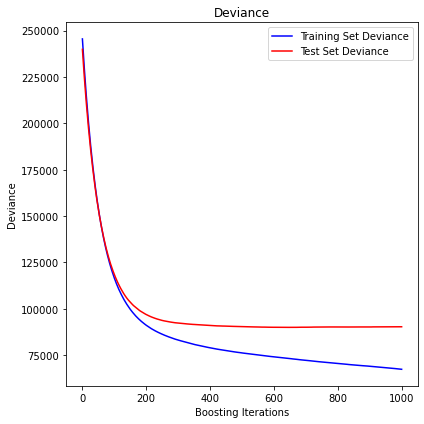

In [28]:
test_score = np.zeros((params['n_estimators'],), dtype=np.float64)
for i, y_pred in enumerate(reg.staged_predict(X_test)):
    test_score[i] = reg.loss_(y_test, y_pred)

fig = plt.figure(figsize=(6, 6))
plt.subplot(1, 1, 1)
plt.title('Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, reg.train_score_, 'b-',
         label='Training Set Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, test_score, 'r-',
         label='Test Set Deviance')
plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Deviance')
fig.tight_layout()
plt.show()

In [29]:
r2=r2_score(y_test , y_pred)
r2

0.6275418017914551

In [44]:
kdu = defi.loc[:, 'Jugador'] == 'Kevin Durant'
kdu_dff=defi.loc[kdu]

kdu_dff.head(3)

,Temporada,Jugador,3P,3PA,2P,2PA,Minutos_Jugados,Partidos_Jugados,Edad,PTS,FT,FTA,WS,WS/48,P31,P32,P33,P3A1,P3A2,P3A3,P21,P22,P23,P2A1,P2A2,P2A3,MIN1,MIN2,MIN3,PJ1,PJ2,PJ3,ED1,ED2,ED3,PTS1,PTS2,PTS3,FT1,FT2,FT3,FTA1,FTA2,FTA3,WS1,WS2,WS3,WS48_1,WS48_2,WS48_3
7807,2017,Kevin Durant,117.0,312.0,434,714,2070.0,62,28.0,1555,336,384,12.0,0.277,186.0,64.0,192.0,481.0,159.0,491.0,512.0,174.0,657.0,900.0,308.0,1197.0,2578.0,913.0,3122.0,72.0,27.0,81.0,27.0,26.0,25.0,2029.0,686.0,2593.0,447.0,146.0,703.0,498.0,171.0,805.0,14.5,4.8,19.2,0.270,0.252,0.295
7808,2016,Kevin Durant,186.0,481.0,512,900,2578.0,72,27.0,2029,447,498,14.5,0.270,64.0,192.0,139.0,159.0,491.0,334.0,174.0,657.0,592.0,308.0,1197.0,1099.0,913.0,3122.0,3119.0,27.0,81.0,81.0,26.0,25.0,24.0,686.0,2593.0,2280.0,146.0,703.0,679.0,171.0,805.0,750.0,4.8,19.2,18.9,0.252,0.295,0.291
7809,2015,Kevin Durant,64.0,159.0,174,308,913.0,27,26.0,686,146,171,4.8,0.252,192.0,139.0,133.0,491.0,334.0,344.0,657.0,592.0,510.0,1197.0,1099.0,953.0,3122.0,3119.0,2546.0,81.0,81.0,66.0,25.0,24.0,23.0,2593.0,2280.0,1850.0,703.0,679.0,431.0,805.0,750.0,501.0,19.2,18.9,12.2,0.295,0.291,0.230


In [45]:
X_test = pd.DataFrame(columns=[[ 'P31', 'P32', 'P33',
       'P3A1', 'P3A2', 'P3A3', 'P21', 'P22', 'P23', 'P2A1', 'P2A2', 'P2A3',
       'MIN1', 'MIN2', 'MIN3', 'PJ1', 'PJ2', 'PJ3', 'ED1', 'ED2', 'ED3',
       'PTS1', 'PTS2', 'PTS3', 'FT1', 'FT2', 'FT3', 'FTA1', 'FTA2', 'FTA3',
       'WS1', 'WS2', 'WS3', 'WS48_1', 'WS48_2', 'WS48_3']])

 

X_test.loc['KD-2018'] = [117.0,186.0,64.0,312.0,481.0,159.0,434,512,174,
                         714,900,308,2070.0,2578.0,913.0,62,72,27,28.0,27.0,26.0,
                         1555,2029,686,336,447,146,384,498,171,12.0,14.5,4.8,0.277,0.270,0.252]
X_test



,P31,P32,P33,P3A1,P3A2,P3A3,P21,P22,P23,P2A1,P2A2,P2A3,MIN1,MIN2,MIN3,PJ1,PJ2,PJ3,ED1,ED2,ED3,PTS1,PTS2,PTS3,FT1,FT2,FT3,FTA1,FTA2,FTA3,WS1,WS2,WS3,WS48_1,WS48_2,WS48_3
KD-2018,117.0,186.0,64.0,312.0,481.0,159.0,434.0,512.0,174.0,714.0,900.0,308.0,2070.0,2578.0,913.0,62.0,72.0,27.0,28.0,27.0,26.0,1555.0,2029.0,686.0,336.0,447.0,146.0,384.0,498.0,171.0,12.0,14.5,4.8,0.277,0.27,0.252


In [46]:
print(mlr.predict(X_test))

[1609.21604591]


/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


In [48]:
print(reg.predict(X_test))

[1571.78716124]


/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


In [34]:
#Tuvo en la realidad 1792

In [49]:
#Otro Caso
mg = defi.loc[:, 'Jugador'] == 'Kyrie Irving'
mg_dff=defi.loc[mg]

mg_dff.head(3)

,Temporada,Jugador,3P,3PA,2P,2PA,Minutos_Jugados,Partidos_Jugados,Edad,PTS,FT,FTA,WS,WS/48,P31,P32,P33,P3A1,P3A2,P3A3,P21,P22,P23,P2A1,P2A2,P2A3,MIN1,MIN2,MIN3,PJ1,PJ2,PJ3,ED1,ED2,ED3,PTS1,PTS2,PTS3,FT1,FT2,FT3,FTA1,FTA2,FTA3,WS1,WS2,WS3,WS48_1,WS48_2,WS48_3
7358,2017,Kyrie Irving,177.0,441.0,494,979,2525.0,72,24.0,1816,297,328,8.9,0.170,84.0,157.0,123.0,262.0,378.0,344.0,310.0,421.0,409.0,617.0,857.0,893.0,1667.0,2730.0,2496.0,53.0,75.0,71.0,23.0,22.0,21.0,1041.0,1628.0,1478.0,169.0,315.0,291.0,191.0,365.0,338.0,5.0,10.4,6.7,0.143,0.183,0.128
7359,2016,Kyrie Irving,84.0,262.0,310,617,1667.0,53,23.0,1041,169,191,5.0,0.143,157.0,123.0,109.0,378.0,344.0,279.0,421.0,409.0,375.0,857.0,893.0,791.0,2730.0,2496.0,2048.0,75.0,71.0,59.0,22.0,21.0,20.0,1628.0,1478.0,1325.0,315.0,291.0,248.0,365.0,338.0,290.0,10.4,6.7,5.3,0.183,0.128,0.125
7360,2015,Kyrie Irving,157.0,378.0,421,857,2730.0,75,22.0,1628,315,365,10.4,0.183,123.0,109.0,73.0,344.0,279.0,183.0,409.0,375.0,277.0,893.0,791.0,564.0,2496.0,2048.0,1558.0,71.0,59.0,51.0,21.0,20.0,19.0,1478.0,1325.0,944.0,291.0,248.0,171.0,338.0,290.0,196.0,6.7,5.3,4.1,0.128,0.125,0.125


In [50]:
X_test = pd.DataFrame(columns=[[ 'P31', 'P32', 'P33',
       'P3A1', 'P3A2', 'P3A3', 'P21', 'P22', 'P23', 'P2A1', 'P2A2', 'P2A3',
       'MIN1', 'MIN2', 'MIN3', 'PJ1', 'PJ2', 'PJ3', 'ED1', 'ED2', 'ED3',
       'PTS1', 'PTS2', 'PTS3', 'FT1', 'FT2', 'FT3', 'FTA1', 'FTA2', 'FTA3',
       'WS1', 'WS2', 'WS3', 'WS48_1', 'WS48_2', 'WS48_3']])

 

X_test.loc['KD-2018'] = [177.0,84.0,157.0,441.0,262.0,378.0,494,310,421,979,617,857,2525.0,1667.0,2730.0,72,53,75,24,23,22,1816,1041,1628,
                        297,169,315,328,191,365,8.9,5.0,10.4,0.170,0.143,0.183]
X_test



,P31,P32,P33,P3A1,P3A2,P3A3,P21,P22,P23,P2A1,P2A2,P2A3,MIN1,MIN2,MIN3,PJ1,PJ2,PJ3,ED1,ED2,ED3,PTS1,PTS2,PTS3,FT1,FT2,FT3,FTA1,FTA2,FTA3,WS1,WS2,WS3,WS48_1,WS48_2,WS48_3
KD-2018,177.0,84.0,157.0,441.0,262.0,378.0,494.0,310.0,421.0,979.0,617.0,857.0,2525.0,1667.0,2730.0,72.0,53.0,75.0,24.0,23.0,22.0,1816.0,1041.0,1628.0,297.0,169.0,315.0,328.0,191.0,365.0,8.9,5.0,10.4,0.17,0.143,0.183


In [51]:
print(mlr.predict(X_test))
print(reg.predict(X_test))

[1406.09347767]
[1554.31550631]


/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


In [52]:
#En la realidad 1466